# Installing required libraries

In [17]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
from preprocessor.DataPreprocessor import DataPreprocessor
from modelling.SplitDataset import SplitDataset

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
path = './data/'
data = pd.read_csv(path + 'train.csv')


In [28]:
print(f'Số lượng dòng của data: {len(data)}')
print(data.columns)

Số lượng dòng của data: 1647
Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [21]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

# I. Preprocessing Data

## 1. Cleaning our data

-

In [29]:
data.dropna(how='all')
data.drop_duplicates()

data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

data[['Max Power BHP', 'Max Power RPM']] = data['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm')
data['Max Power BHP'] = pd.to_numeric(data['Max Power BHP'], errors='coerce')
data['Max Power RPM'] = pd.to_numeric(data['Max Power RPM'], errors='coerce')

data[['Max Torque Nm', 'Max Torque RPM']] = data['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm')
data['Max Torque Nm'] = pd.to_numeric(data['Max Torque Nm'], errors='coerce')
data['Max Torque RPM'] = pd.to_numeric(data['Max Torque RPM'], errors='coerce')

data = data.drop('Max Power', axis=1)
data = data.drop('Max Torque', axis=1)

In [ ]:
data

spltio


In [30]:
splitter = SplitDataset(data)

In [31]:
train_, val_, test_ = splitter.split_data()

In [33]:
train_.to_csv(path + 'train_.csv', index=False)
val_.to_csv(path + 'val_.csv', index=False)
test_.to_csv(path + 'test_.csv', index=False)

data = train_

## 2. Dealing with missing values

In [34]:
preprocessor = DataPreprocessor(data)

data.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                38
Drivetrain            63
Length                31
Width                 31
Height                31
Seating Capacity      31
Fuel Tank Capacity    50
Max Power BHP         99
Max Power RPM         99
Max Torque Nm         99
Max Torque RPM        99
dtype: int64

In [35]:
data.columns[data.isnull().any()]

Index(['Engine', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Max Power BHP', 'Max Power RPM', 'Max Torque Nm',
       'Max Torque RPM'],
      dtype='object')

### 2.1. Filling with mean

In [37]:
mean_columns = ['Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power BHP', 'Max Power RPM', 'Max Torque Nm','Max Torque RPM']
data = preprocessor.fill_mean(mean_columns)

data.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Drivetrain            63
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity     0
Max Power BHP          0
Max Power RPM          0
Max Torque Nm          0
Max Torque RPM         0
dtype: int64

### 2.2. Filling with median

In [ ]:
median_columns = []
data = preprocessor.fill_median(median_columns)

data.isna().sum()

### 2.3. Filling with the most common value

In [ ]:
mode_columns = []
data = preprocessor.fill_mode(mode_columns)

data.isna().sum()

### 2.4. Filling using KNN (K-nearest neighbour)

In [38]:
knn_columns = ['Drivetrain']
data = preprocessor.fill_knn(columns=knn_columns, k=5)

data.isna().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Max Power BHP         0
Max Power RPM         0
Max Torque Nm         0
Max Torque RPM        0
dtype: int64

## 3. Encoding categorical values

### 3.1. Ordinal encoding

In [39]:
data = preprocessor.ordinal_encode(col='Owner', to={
    "UnRegistered Car": 0,
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth": 4,
    "4 or More": 4
})

data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,Ford,Endeavour Trend 2.2 4x2 AT,2350000,2016,75000,Diesel,Automatic,Mohali,White,2,...,RWD,4892.0,1860.0,1837.0,7.0,80.0,158.0,3200.0,385.0,1600.0
1,Toyota,Urban Cruiser Premium Grade AT,1050000,2021,1910,Petrol,Automatic,Varanasi,White,1,...,FWD,3995.0,1790.0,1640.0,5.0,48.0,103.0,6000.0,138.0,4400.0
2,Maruti Suzuki,Alto 800 Lxi,210000,2014,42505,Petrol,Manual,Purnea,Red,1,...,FWD,3395.0,1490.0,1475.0,5.0,35.0,47.0,6000.0,69.0,3500.0
3,Honda,City SV Diesel,550000,2014,85000,Diesel,Manual,Jaipur,Silver,1,...,FWD,4440.0,1695.0,1495.0,5.0,40.0,99.0,3600.0,200.0,1750.0
4,Hyundai,Eon Era +,290000,2018,70000,Petrol,Manual,Kheda,White,1,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,2790000,2018,25000,Diesel,Automatic,Chennai,White,1,...,FWD,4439.0,1821.0,1612.0,5.0,51.0,188.0,4000.0,400.0,1750.0
984,Audi,Q7 45 TDI Premium Plus,5175000,2016,65000,Diesel,Automatic,Pune,Blue,1,...,AWD,5052.0,1968.0,1740.0,7.0,75.0,245.0,2910.0,600.0,1500.0
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],850000,2019,28000,Diesel,Manual,Mumbai,White,1,...,FWD,3998.0,1765.0,1647.0,5.0,52.0,99.0,3750.0,205.0,1750.0
986,Tata,Nexon XMA Petrol,580000,2018,81000,Petrol,Automatic,Valsad,Red,1,...,FWD,3994.0,1811.0,1607.0,5.0,44.0,108.0,5000.0,170.0,1750.0


### 3.2. One-hot encoding

In [40]:
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Max Power BHP,Max Power RPM,Max Torque Nm,Max Torque RPM
0,Ford,Endeavour Trend 2.2 4x2 AT,2350000,2016,75000,Diesel,Automatic,Mohali,White,2,...,RWD,4892.0,1860.0,1837.0,7.0,80.0,158.0,3200.0,385.0,1600.0
1,Toyota,Urban Cruiser Premium Grade AT,1050000,2021,1910,Petrol,Automatic,Varanasi,White,1,...,FWD,3995.0,1790.0,1640.0,5.0,48.0,103.0,6000.0,138.0,4400.0
2,Maruti Suzuki,Alto 800 Lxi,210000,2014,42505,Petrol,Manual,Purnea,Red,1,...,FWD,3395.0,1490.0,1475.0,5.0,35.0,47.0,6000.0,69.0,3500.0
3,Honda,City SV Diesel,550000,2014,85000,Diesel,Manual,Jaipur,Silver,1,...,FWD,4440.0,1695.0,1495.0,5.0,40.0,99.0,3600.0,200.0,1750.0
4,Hyundai,Eon Era +,290000,2018,70000,Petrol,Manual,Kheda,White,1,...,FWD,3495.0,1550.0,1500.0,5.0,32.0,55.0,5500.0,75.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,2790000,2018,25000,Diesel,Automatic,Chennai,White,1,...,FWD,4439.0,1821.0,1612.0,5.0,51.0,188.0,4000.0,400.0,1750.0
984,Audi,Q7 45 TDI Premium Plus,5175000,2016,65000,Diesel,Automatic,Pune,Blue,1,...,AWD,5052.0,1968.0,1740.0,7.0,75.0,245.0,2910.0,600.0,1500.0
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],850000,2019,28000,Diesel,Manual,Mumbai,White,1,...,FWD,3998.0,1765.0,1647.0,5.0,52.0,99.0,3750.0,205.0,1750.0
986,Tata,Nexon XMA Petrol,580000,2018,81000,Petrol,Automatic,Valsad,Red,1,...,FWD,3994.0,1811.0,1607.0,5.0,44.0,108.0,5000.0,170.0,1750.0


In [41]:
one_hot_columns = ['Drivetrain', 'Fuel Type']
threshold = 0 # should be an integer
data = preprocessor.one_hot_encode(columns=one_hot_columns, threshold=threshold)

data

,Make,Model,Price,Year,Kilometer,Transmission,Location,Color,Owner,Seller Type,...,Max Torque RPM,Drivetrain_FWD,Drivetrain_RWD,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + LPG
0,Ford,Endeavour Trend 2.2 4x2 AT,2350000,2016,75000,Automatic,Mohali,White,2,Individual,...,1600.0,False,True,False,True,False,False,False,False,False
1,Toyota,Urban Cruiser Premium Grade AT,1050000,2021,1910,Automatic,Varanasi,White,1,Individual,...,4400.0,True,False,False,False,False,False,False,True,False
2,Maruti Suzuki,Alto 800 Lxi,210000,2014,42505,Manual,Purnea,Red,1,Individual,...,3500.0,True,False,False,False,False,False,False,True,False
3,Honda,City SV Diesel,550000,2014,85000,Manual,Jaipur,Silver,1,Individual,...,1750.0,True,False,False,True,False,False,False,False,False
4,Hyundai,Eon Era +,290000,2018,70000,Manual,Kheda,White,1,Individual,...,4000.0,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,2790000,2018,25000,Automatic,Chennai,White,1,Individual,...,1750.0,True,False,False,True,False,False,False,False,False
984,Audi,Q7 45 TDI Premium Plus,5175000,2016,65000,Automatic,Pune,Blue,1,Individual,...,1500.0,False,False,False,True,False,False,False,False,False
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],850000,2019,28000,Manual,Mumbai,White,1,Individual,...,1750.0,True,False,False,True,False,False,False,False,False
986,Tata,Nexon XMA Petrol,580000,2018,81000,Automatic,Valsad,Red,1,Individual,...,1750.0,True,False,False,False,False,False,False,True,False


## 4. Scaling our data

plot

In [43]:
import math

def visualize_relationship_with_a_variable(df: pd.DataFrame, col: str=None):
    numeric_data = df.select_dtypes(include=['number'])

    correlations = numeric_data.corr()[col]
    num_cols = [c for c in numeric_data.columns if c != "Price"]

    num_plots = len(num_cols)
    cols_per_row = 3
    num_rows = math.ceil(num_plots / cols_per_row)

    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5 * cols_per_row, 5 * num_rows))

    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        corr_value = correlations[col]
        sns.scatterplot(x=numeric_data[col], y=numeric_data["Price"], ax=axes[i])
        axes[i].set_title(f"{col} vs Price (corr={corr_value:.2f})")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Price")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

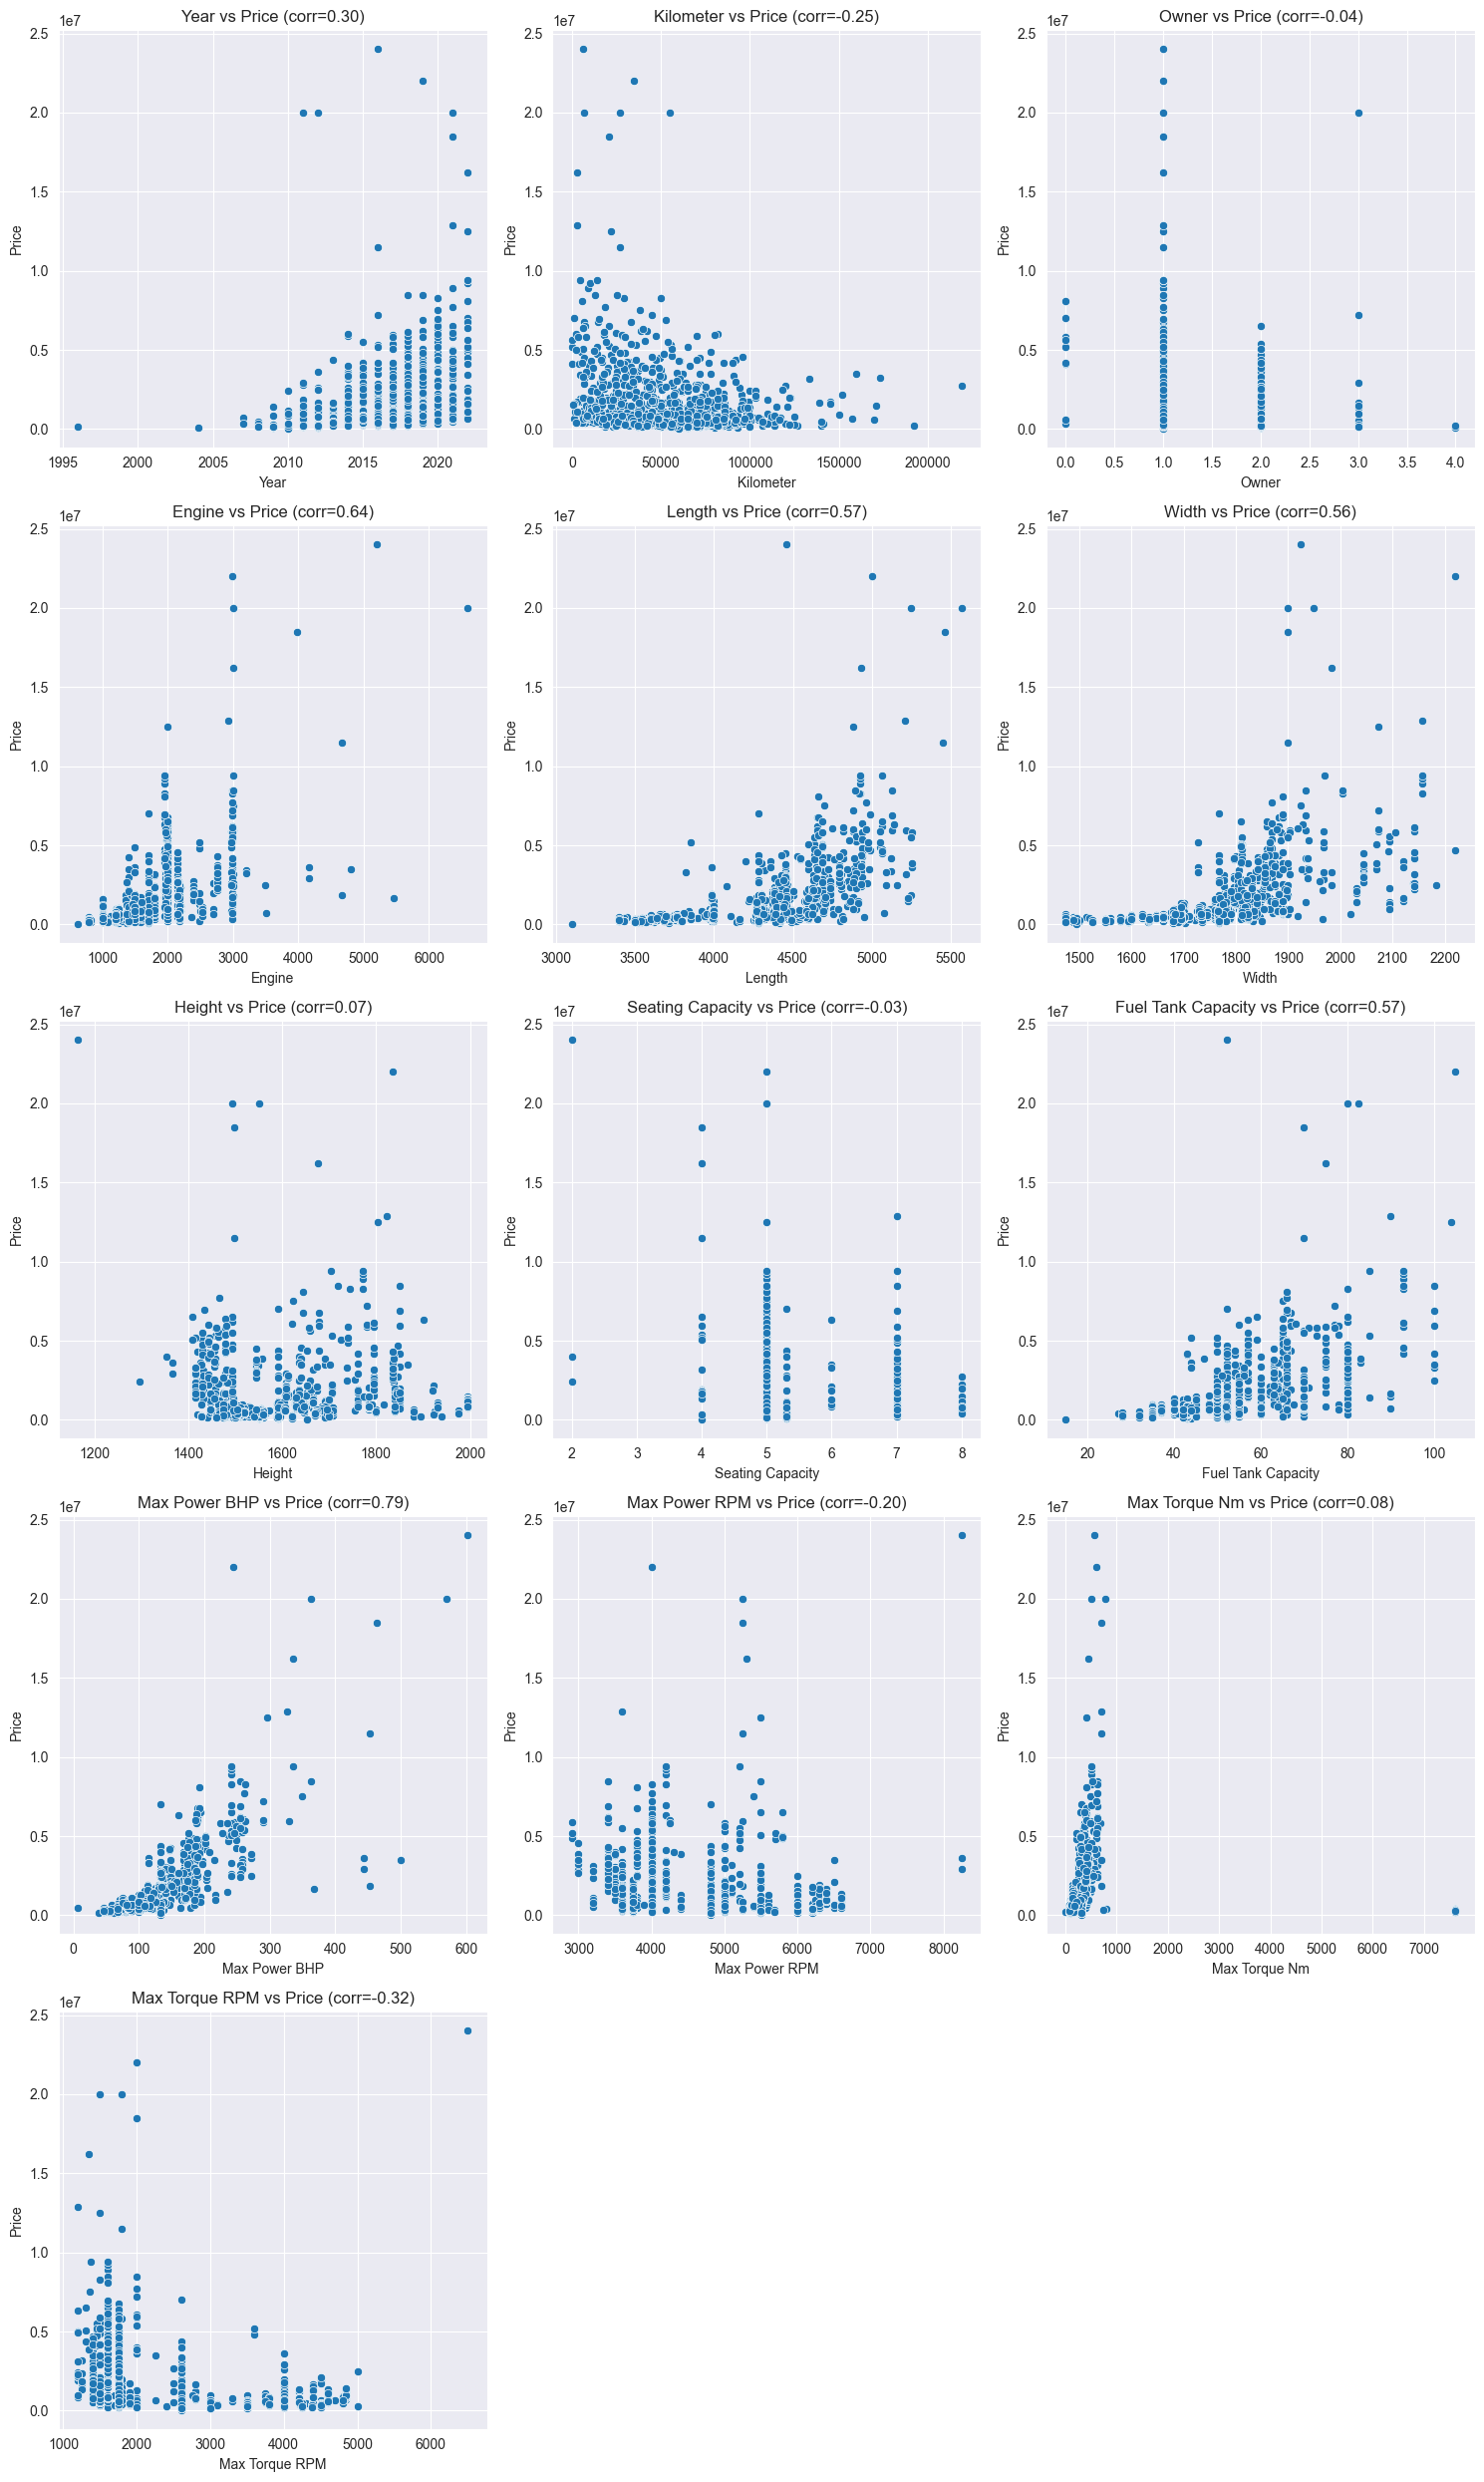

In [44]:
visualize_relationship_with_a_variable(data, 'Price')

### 4.1. Log transformation

In [45]:
log_column = ['Price', 'Max Torque RPM'] ## vi data['Price'] co gia tri dac biet (cao bat thuong)
data = preprocessor.log_norm(log_column)

data

,Make,Model,Price,Year,Kilometer,Transmission,Location,Color,Owner,Seller Type,...,Max Torque RPM,Drivetrain_FWD,Drivetrain_RWD,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + LPG
0,Ford,Endeavour Trend 2.2 4x2 AT,14.669926,2016,75000,Automatic,Mohali,White,2,Individual,...,7.378384,False,True,False,True,False,False,False,False,False
1,Toyota,Urban Cruiser Premium Grade AT,13.864302,2021,1910,Automatic,Varanasi,White,1,Individual,...,8.389587,True,False,False,False,False,False,False,True,False
2,Maruti Suzuki,Alto 800 Lxi,12.254868,2014,42505,Manual,Purnea,Red,1,Individual,...,8.160804,True,False,False,False,False,False,False,True,False
3,Honda,City SV Diesel,13.217675,2014,85000,Manual,Jaipur,Silver,1,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
4,Hyundai,Eon Era +,12.577640,2018,70000,Manual,Kheda,White,1,Individual,...,8.294300,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,14.841553,2018,25000,Automatic,Chennai,White,1,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
984,Audi,Q7 45 TDI Premium Plus,15.459350,2016,65000,Automatic,Pune,Blue,1,Individual,...,7.313887,False,False,False,True,False,False,False,False,False
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],13.652993,2019,28000,Manual,Mumbai,White,1,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
986,Tata,Nexon XMA Petrol,13.270785,2018,81000,Automatic,Valsad,Red,1,Individual,...,7.467942,True,False,False,False,False,False,False,True,False


### 4.2. Min-Max scaling

In [49]:
minmax_columns = ['Year', 'Kilometer']
data = preprocessor.minmax_norm(minmax_columns)

data

,Make,Model,Price,Year,Kilometer,Transmission,Location,Color,Owner,Seller Type,...,Max Torque RPM,Drivetrain_FWD,Drivetrain_RWD,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + LPG
0,Ford,Endeavour Trend 2.2 4x2 AT,14.669926,0.769231,0.342466,Automatic,Mohali,White,1.557682,Individual,...,7.378384,False,True,False,True,False,False,False,False,False
1,Toyota,Urban Cruiser Premium Grade AT,13.864302,0.961538,0.008721,Automatic,Varanasi,White,-0.430677,Individual,...,8.389587,True,False,False,False,False,False,False,True,False
2,Maruti Suzuki,Alto 800 Lxi,12.254868,0.692308,0.194087,Manual,Purnea,Red,-0.430677,Individual,...,8.160804,True,False,False,False,False,False,False,True,False
3,Honda,City SV Diesel,13.217675,0.692308,0.388128,Manual,Jaipur,Silver,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
4,Hyundai,Eon Era +,12.577640,0.846154,0.319635,Manual,Kheda,White,-0.430677,Individual,...,8.294300,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,14.841553,0.846154,0.114155,Automatic,Chennai,White,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
984,Audi,Q7 45 TDI Premium Plus,15.459350,0.769231,0.296804,Automatic,Pune,Blue,-0.430677,Individual,...,7.313887,False,False,False,True,False,False,False,False,False
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],13.652993,0.884615,0.127854,Manual,Mumbai,White,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
986,Tata,Nexon XMA Petrol,13.270785,0.846154,0.369863,Automatic,Valsad,Red,-0.430677,Individual,...,7.467942,True,False,False,False,False,False,False,True,False


### 4.3. Standardization

In [47]:
std_column = ['Max Power RPM', 'Owner']
data = preprocessor.standard_norm(std_column)

data

,Make,Model,Price,Year,Kilometer,Transmission,Location,Color,Owner,Seller Type,...,Max Torque RPM,Drivetrain_FWD,Drivetrain_RWD,Fuel Type_CNG + CNG,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + LPG
0,Ford,Endeavour Trend 2.2 4x2 AT,14.669926,2016,75000,Automatic,Mohali,White,1.557682,Individual,...,7.378384,False,True,False,True,False,False,False,False,False
1,Toyota,Urban Cruiser Premium Grade AT,13.864302,2021,1910,Automatic,Varanasi,White,-0.430677,Individual,...,8.389587,True,False,False,False,False,False,False,True,False
2,Maruti Suzuki,Alto 800 Lxi,12.254868,2014,42505,Manual,Purnea,Red,-0.430677,Individual,...,8.160804,True,False,False,False,False,False,False,True,False
3,Honda,City SV Diesel,13.217675,2014,85000,Manual,Jaipur,Silver,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
4,Hyundai,Eon Era +,12.577640,2018,70000,Manual,Kheda,White,-0.430677,Individual,...,8.294300,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,BMW,X1 sDrive20d Expedition,14.841553,2018,25000,Automatic,Chennai,White,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
984,Audi,Q7 45 TDI Premium Plus,15.459350,2016,65000,Automatic,Pune,Blue,-0.430677,Individual,...,7.313887,False,False,False,True,False,False,False,False,False
985,Ford,Ecosport Titanium + 1.5L TDCi [2019-2020],13.652993,2019,28000,Manual,Mumbai,White,-0.430677,Individual,...,7.467942,True,False,False,True,False,False,False,False,False
986,Tata,Nexon XMA Petrol,13.270785,2018,81000,Automatic,Valsad,Red,-0.430677,Individual,...,7.467942,True,False,False,False,False,False,False,True,False


### 4.4 Robust scaling

In [ ]:
robust_column = []
focus = 0.5
data = preprocessor.robust_norm(robust_column, focus)

data

vis

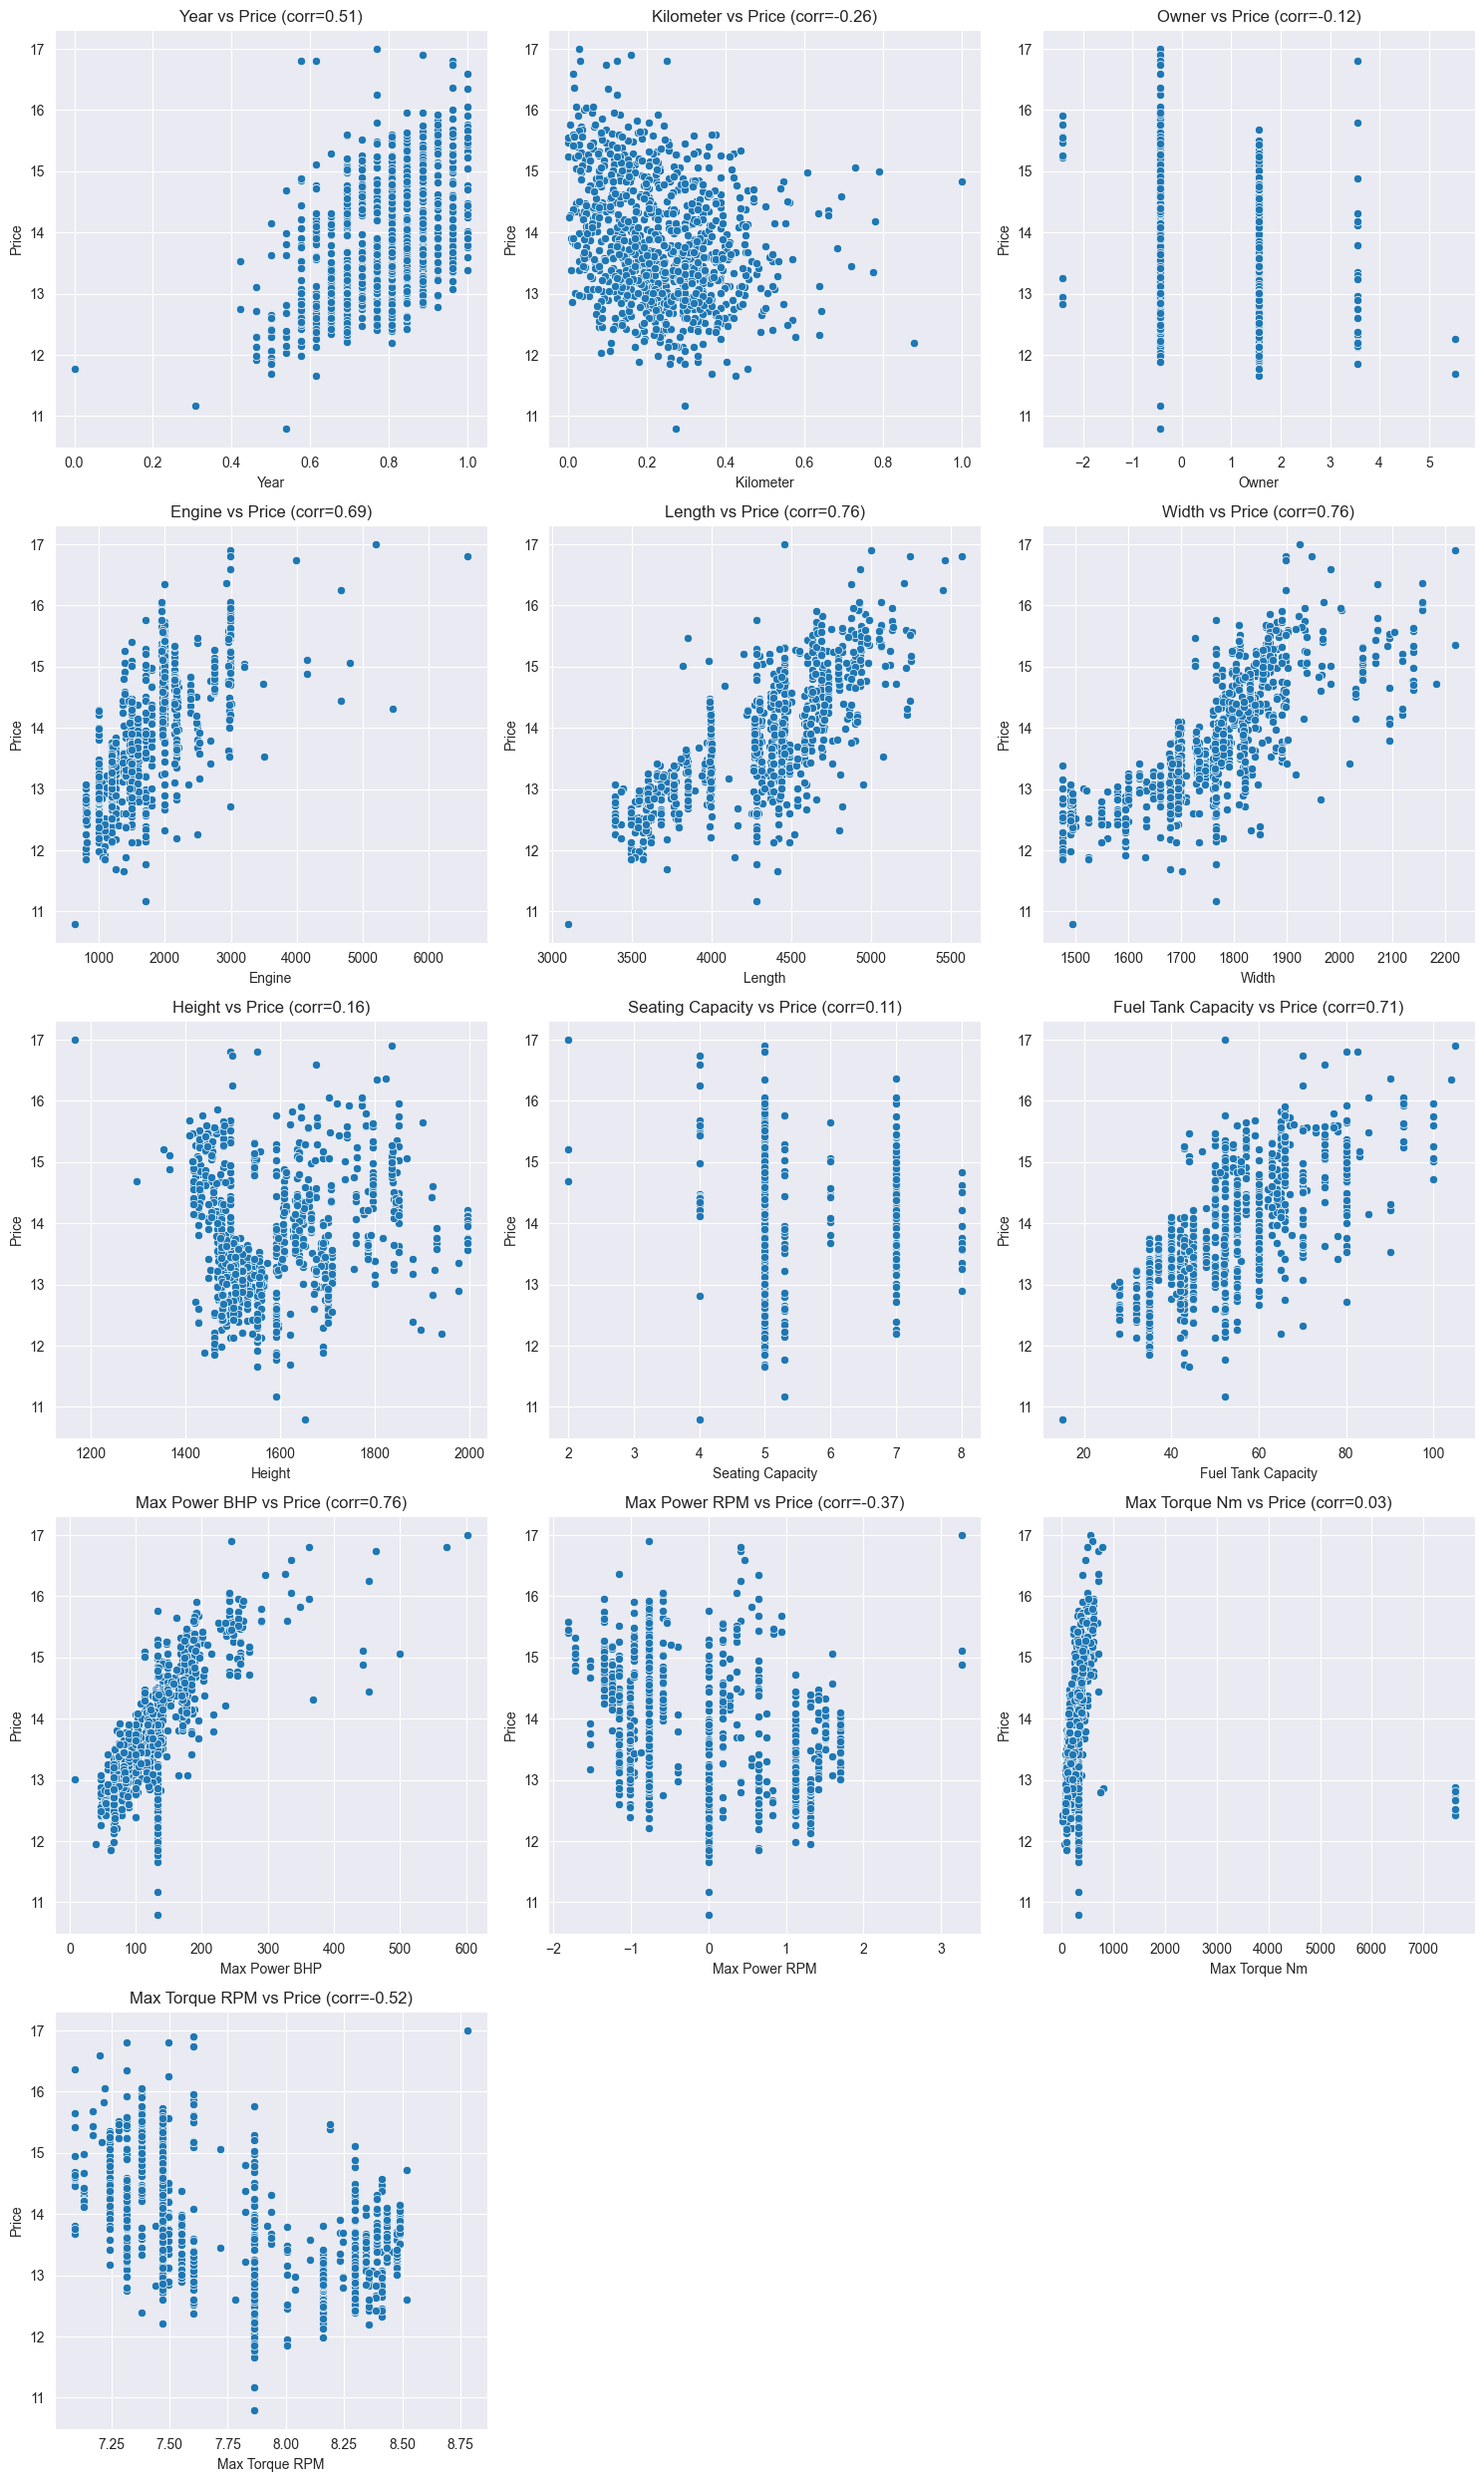

In [50]:
visualize_relationship_with_a_variable(data, 'Price')

In [51]:
data.to_csv(path + 'preprocessed_train_.csv', index=False)

In [ ]:
scalers =